# 单变量线性回归实战教程 - 世界幸福指数预测

## 🎯 学习目标
- 理解单变量线性回归的实际应用
- 学会使用真实数据进行机器学习建模
- 掌握数据预处理和模型评估的方法
- 通过可视化理解模型的预测效果

---

## 📊 第一部分：数据介绍

我们将使用2017年世界幸福指数报告的数据，探索经济因素（GDP per Capita）与幸福指数之间的关系。

### 数据集特点：
- **输入特征**：Economy (GDP per Capita) - 人均GDP
- **目标变量**：Happiness Score - 幸福指数
- **数据来源**：2017年世界幸福指数报告
- **样本数量**：约155个国家和地区

In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from linear_regression import LinearRegression

print("✅ 库导入成功！")

✅ 库导入成功！


## 📈 第二部分：数据加载与探索

In [2]:
# 加载数据
data = pd.read_csv('../data/world-happiness-report-2017.csv')

print("📊 数据基本信息：")
print(f"数据形状: {data.shape}")
print(f"\n前5行数据:")
print(data.head())

print(f"\n数据列名:")
print(data.columns.tolist())

📊 数据基本信息：
数据形状: (155, 12)

前5行数据:
       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.C

In [3]:
# 数据统计信息
print("📈 关键变量统计信息：")
print(data[['Economy..GDP.per.Capita.', 'Happiness.Score']].describe())

# 检查缺失值
print("\n🔍 缺失值检查：")
print(data[['Economy..GDP.per.Capita.', 'Happiness.Score']].isnull().sum())

📈 关键变量统计信息：
       Economy..GDP.per.Capita.  Happiness.Score
count                155.000000       155.000000
mean                   0.984718         5.354019
std                    0.420793         1.131230
min                    0.000000         2.693000
25%                    0.663371         4.505500
50%                    1.064578         5.279000
75%                    1.318027         6.101500
max                    1.870766         7.537000

🔍 缺失值检查：
Economy..GDP.per.Capita.    0
Happiness.Score             0
dtype: int64


## 🎲 第三部分：数据预处理与分割

In [4]:
# 数据分割：80%训练，20%测试
train_data = data.sample(frac=0.8, random_state=42)  # 设置随机种子确保结果可重现
test_data = data.drop(train_data.index)

print(f"📊 数据分割结果：")
print(f"训练集大小: {len(train_data)}")
print(f"测试集大小: {len(test_data)}")

# 定义特征和目标变量
input_param_name = 'Economy..GDP.per.Capita.'
output_param_name = 'Happiness.Score'

# 提取训练数据
x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

# 提取测试数据
x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

print(f"\n📏 数据维度：")
print(f"x_train形状: {x_train.shape}")
print(f"y_train形状: {y_train.shape}")
print(f"x_test形状: {x_test.shape}")
print(f"y_test形状: {y_test.shape}")

📊 数据分割结果：
训练集大小: 124
测试集大小: 31

📏 数据维度：
x_train形状: (124, 1)
y_train形状: (124, 1)
x_test形状: (31, 1)
y_test形状: (31, 1)


## 📊 第四部分：数据可视化

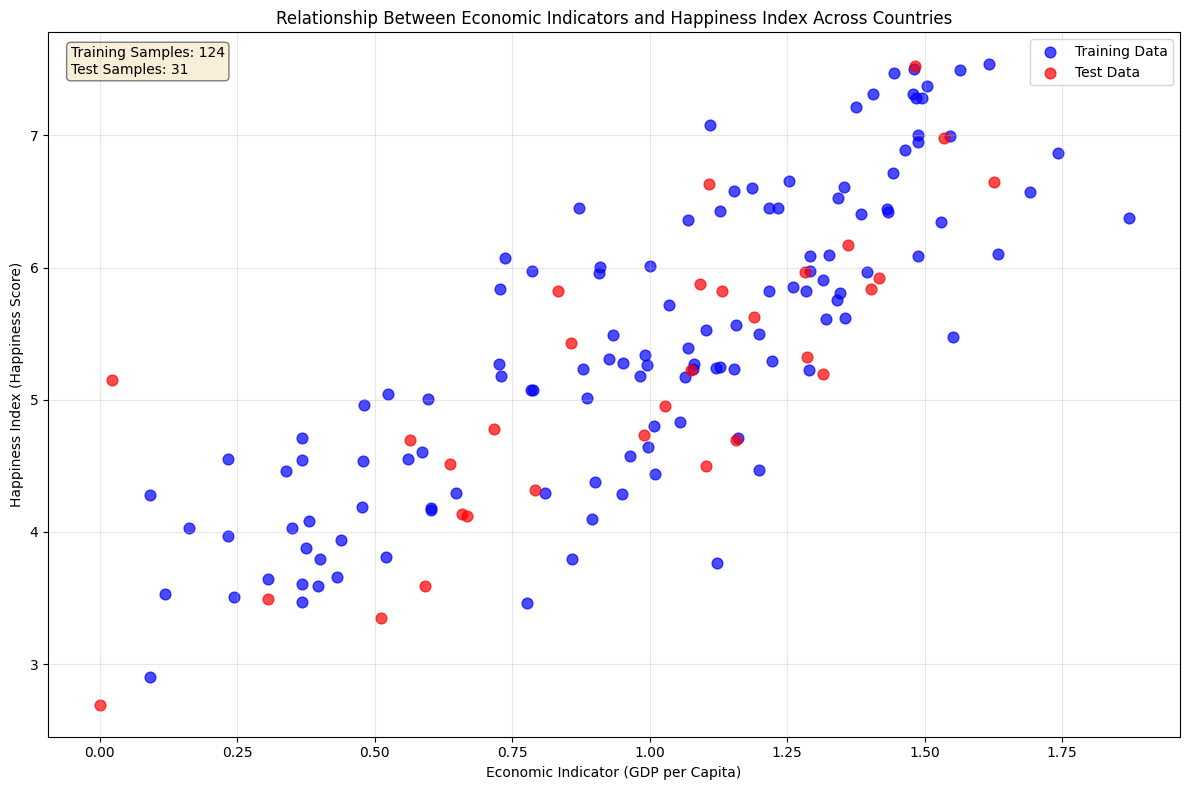

📈 从图中可以看出，经济指标与幸福指数之间存在明显的正相关关系！
💡 这为我们使用线性回归建模提供了良好的基础。


In [5]:
# 可视化训练和测试数据
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, alpha=0.7, color='blue', label='Training Data', s=60)
plt.scatter(x_test, y_test, alpha=0.7, color='red', label='Test Data', s=60)

plt.xlabel('Economic Indicator (GDP per Capita)')
plt.ylabel('Happiness Index (Happiness Score)')
plt.title('Relationship Between Economic Indicators and Happiness Index Across Countries')
plt.legend()
plt.grid(True, alpha=0.3)

# 添加一些统计信息
plt.text(0.02, 0.98, f'Training Samples: {len(x_train)}\nTest Samples: {len(x_test)}', 
         transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


print("📈 从图中可以看出，经济指标与幸福指数之间存在明显的正相关关系！")
print("💡 这为我们使用线性回归建模提供了良好的基础。")

## 🤖 第五部分：模型训练

In [6]:
# 设置训练参数
num_iterations = 500
learning_rate = 0.01

print("🚀 开始训练线性回归模型...")
print(f"训练参数：")
print(f"  - 迭代次数: {num_iterations}")
print(f"  - 学习率: {learning_rate}")
print(f"  - 训练样本数: {len(x_train)}")

# 创建并训练模型
linear_regression = LinearRegression(x_train, y_train)
(theta, cost_history) = linear_regression.train(learning_rate, num_iterations)

print(f"\n✅ 训练完成！")
print(f"初始损失: {cost_history[0]:.6f}")
print(f"最终损失: {cost_history[-1]:.6f}")
print(f"损失降低: {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):.2f}%")

🚀 开始训练线性回归模型...
训练参数：
  - 迭代次数: 500
  - 学习率: 0.01
  - 训练样本数: 124

✅ 训练完成！
初始损失: 14.945375
最终损失: 0.210835
损失降低: 98.59%


## 📉 第六部分：训练过程可视化

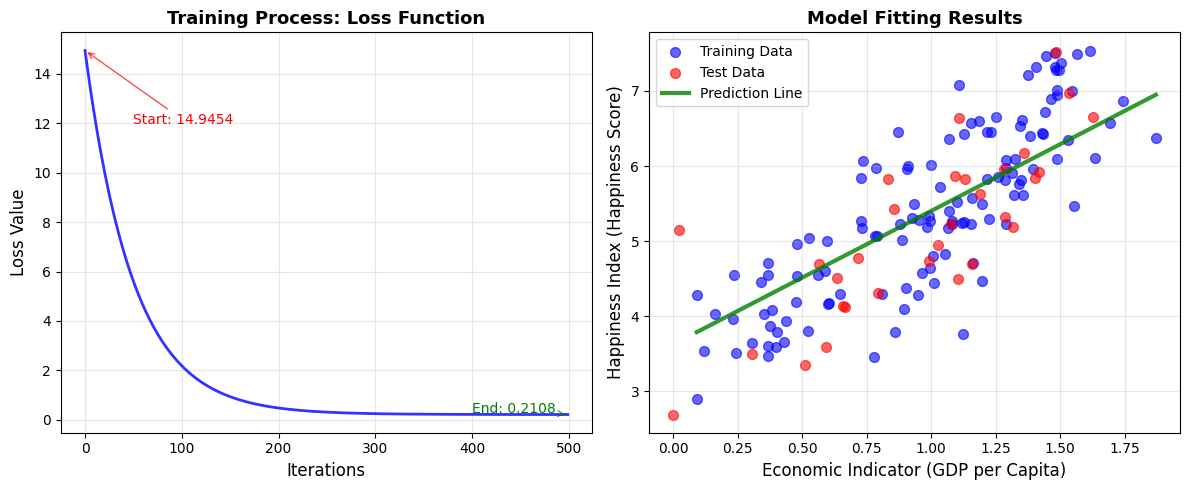

📊 左图显示损失函数随训练过程逐渐下降，说明模型在不断学习优化！
📊 右图显示绿色预测线很好地拟合了蓝色和红色的数据点！


In [8]:
# 可视化训练过程
plt.figure(figsize=(12, 5))

# 左图：损失函数变化
plt.subplot(1, 2, 1)
plt.plot(range(num_iterations), cost_history, 'b-', linewidth=2, alpha=0.8)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('Training Process: Loss Function', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# 添加关键点标注
plt.annotate(f'Start: {cost_history[0]:.4f}', 
             xy=(0, cost_history[0]), xytext=(50, cost_history[0]*0.8),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, color='red')
plt.annotate(f'End: {cost_history[-1]:.4f}', 
             xy=(num_iterations-1, cost_history[-1]), xytext=(num_iterations-100, cost_history[-1]*1.2),
             arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
             fontsize=10, color='green')

# 右图：模型拟合效果
plt.subplot(1, 2, 2)

# 绘制原始数据点
plt.scatter(x_train, y_train, alpha=0.6, color='blue', label='Training Data', s=50)
plt.scatter(x_test, y_test, alpha=0.6, color='red', label='Test Data', s=50)

# 生成预测线
predictions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), predictions_num).reshape(predictions_num, 1)
y_predictions = linear_regression.predict(x_predictions)

plt.plot(x_predictions, y_predictions, 'g-', linewidth=3, label='Prediction Line', alpha=0.8)
plt.xlabel('Economic Indicator (GDP per Capita)', fontsize=12)
plt.ylabel('Happiness Index (Happiness Score)', fontsize=12)
plt.title('Model Fitting Results', fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 左图显示损失函数随训练过程逐渐下降，说明模型在不断学习优化！")
print("📊 右图显示绿色预测线很好地拟合了蓝色和红色的数据点！")

## 🎯 第七部分：模型评估与预测

In [9]:
# 在测试集上进行预测
test_predictions = linear_regression.predict(x_test)

# 计算评估指标
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    
    # 计算R²（决定系数）
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return mse, rmse, mae, r2

mse, rmse, mae, r2 = calculate_metrics(y_test, test_predictions)

print("🎯 模型在测试集上的表现：")
print(f"  均方误差 (MSE): {mse:.4f}")
print(f"  均方根误差 (RMSE): {rmse:.4f}")
print(f"  平均绝对误差 (MAE): {mae:.4f}")
print(f"  决定系数 (R²): {r2:.4f}")

print(f"\n📊 模型解释：")
print(f"  R² = {r2:.4f} 意味着模型能够解释 {r2*100:.1f}% 的数据变异")
print(f"  平均预测误差约为 {mae:.3f} 个幸福指数单位")

🎯 模型在测试集上的表现：
  均方误差 (MSE): 0.5016
  均方根误差 (RMSE): 0.7082
  平均绝对误差 (MAE): 0.5798
  决定系数 (R²): 0.5771

📊 模型解释：
  R² = 0.5771 意味着模型能够解释 57.7% 的数据变异
  平均预测误差约为 0.580 个幸福指数单位


In [10]:
# 预测一些具体的例子
print("🔮 让我们用模型进行一些有趣的预测：")
print("="*50)

# 选择一些有代表性的GDP值进行预测
sample_gdp_values = np.array([[0.2], [0.5], [0.8], [1.0], [1.2], [1.4]])
sample_predictions = linear_regression.predict(sample_gdp_values)

for gdp, happiness in zip(sample_gdp_values.flatten(), sample_predictions.flatten()):
    print(f"当GDP指标为 {gdp:.1f} 时，预测幸福指数为 {happiness:.2f}")

print("\n💡 观察：随着经济指标的提高，幸福指数也相应增加！")

🔮 让我们用模型进行一些有趣的预测：
当GDP指标为 0.2 时，预测幸福指数为 3.90
当GDP指标为 0.5 时，预测幸福指数为 4.58
当GDP指标为 0.8 时，预测幸福指数为 5.26
当GDP指标为 1.0 时，预测幸福指数为 5.71
当GDP指标为 1.2 时，预测幸福指数为 6.16
当GDP指标为 1.4 时，预测幸福指数为 6.61

💡 观察：随着经济指标的提高，幸福指数也相应增加！


## 📊 第八部分：预测效果可视化

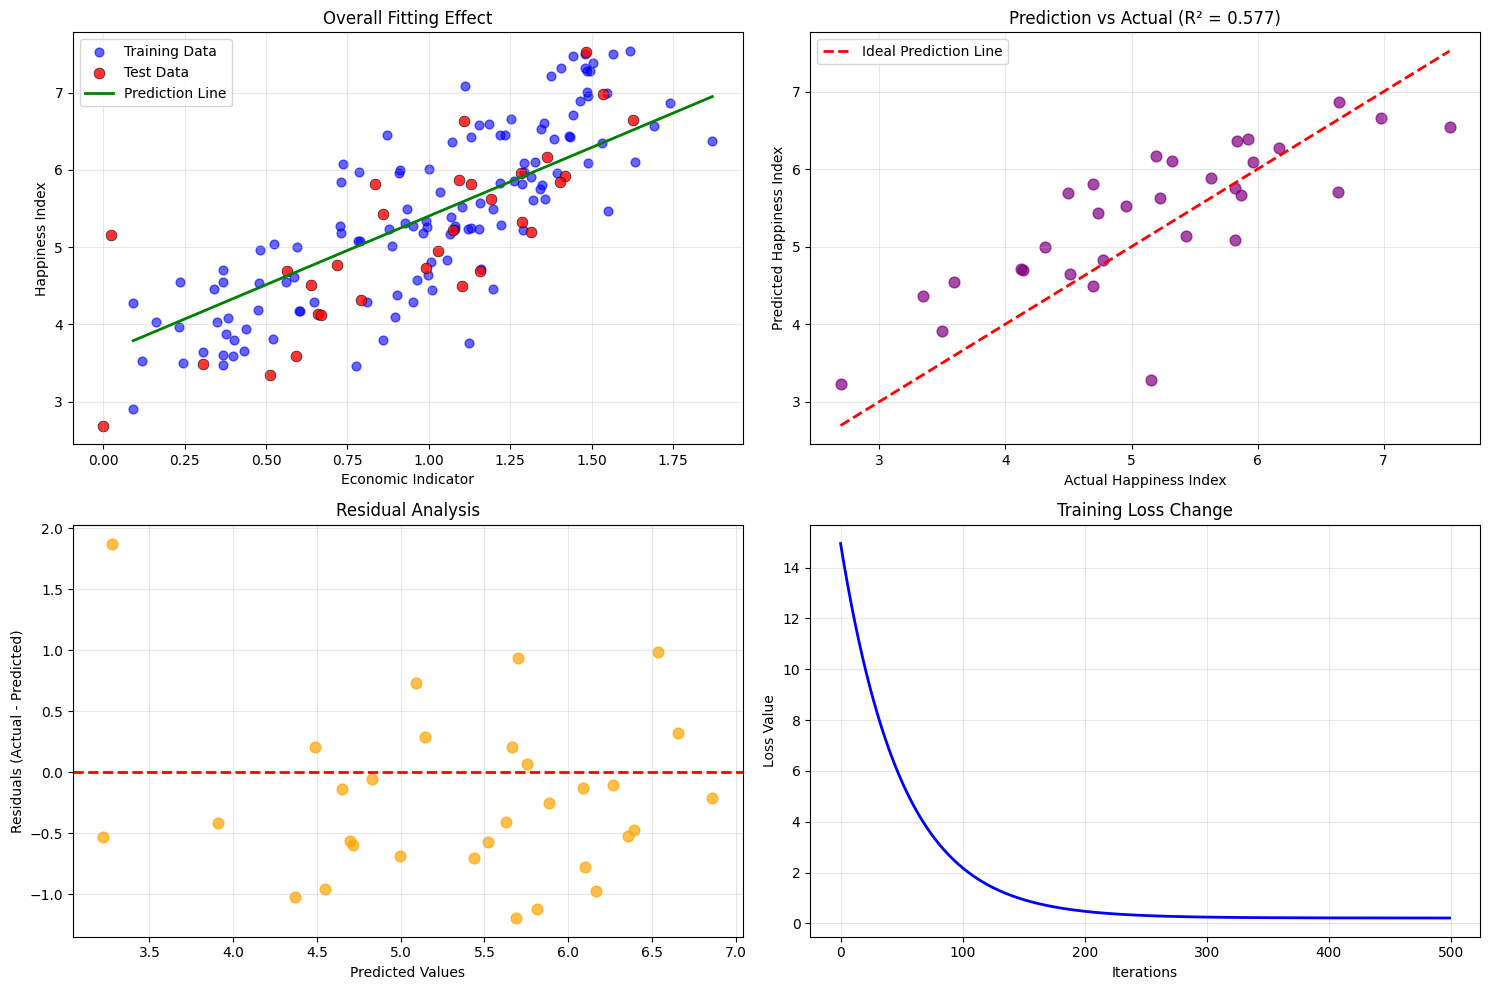

📊 图表解读：
  • 左上：整体拟合效果，绿线很好地穿过了数据点
  • 右上：预测vs实际，点越接近红色虚线说明预测越准确
  • 左下：残差分析，残差随机分布说明模型拟合良好
  • 右下：训练过程，损失持续下降说明模型在学习


In [11]:
# 创建详细的预测效果图
plt.figure(figsize=(15, 10))

# 第一个子图：整体拟合效果
plt.subplot(2, 2, 1)
plt.scatter(x_train, y_train, alpha=0.6, color='blue', label='Training Data', s=40)
plt.scatter(x_test, y_test, alpha=0.8, color='red', label='Test Data', s=60, edgecolors='black', linewidth=0.5)

# 预测线
x_line = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
y_line = linear_regression.predict(x_line)
plt.plot(x_line, y_line, 'g-', linewidth=2, label='Prediction Line')

plt.xlabel('Economic Indicator')
plt.ylabel('Happiness Index')
plt.title('Overall Fitting Effect')
plt.legend()
plt.grid(True, alpha=0.3)

# 第二个子图：预测vs实际值
plt.subplot(2, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.7, color='purple', s=60)
# 添加理想预测线（y=x）
min_val = min(y_test.min(), test_predictions.min())
max_val = max(y_test.max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal Prediction Line')

plt.xlabel('Actual Happiness Index')
plt.ylabel('Predicted Happiness Index')
plt.title(f'Prediction vs Actual (R² = {r2:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)

# 第三个子图：残差分析
plt.subplot(2, 2, 3)
residuals = y_test - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.7, color='orange', s=60)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)

# 第四个子图：训练历史
plt.subplot(2, 2, 4)
plt.plot(cost_history, 'b-', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.title('Training Loss Change')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 图表解读：")
print("  • 左上：整体拟合效果，绿线很好地穿过了数据点")
print("  • 右上：预测vs实际，点越接近红色虚线说明预测越准确")
print("  • 左下：残差分析，残差随机分布说明模型拟合良好")
print("  • 右下：训练过程，损失持续下降说明模型在学习")

## 🎓 第九部分：模型参数解释

In [12]:
# 获取模型参数
intercept = theta[0][0]  # 截距
slope = theta[1][0]     # 斜率

print("🔍 模型参数详细解释：")
print("="*50)
print(f"📐 线性回归方程：幸福指数 = {intercept:.4f} + {slope:.4f} × 经济指标")
print()
print(f"📊 参数含义：")
print(f"  • 截距 (θ₀) = {intercept:.4f}")
print(f"    含义：当经济指标为0时，基础幸福指数为 {intercept:.4f}")
print(f"  • 斜率 (θ₁) = {slope:.4f}")
print(f"    含义：经济指标每增加1个单位，幸福指数平均增加 {slope:.4f} 个单位")
print()
print(f"💡 实际意义：")
if slope > 0:
    print(f"  经济发展与幸福指数呈正相关关系")
    print(f"  经济指标的改善能够带来幸福感的提升")
else:
    print(f"  经济发展与幸福指数呈负相关关系")
    
print(f"\n🌍 政策启示：")
print(f"  提高人均GDP可能是提升国民幸福感的有效途径之一")
print(f"  但需要注意，幸福感还受到其他多种因素的影响")

🔍 模型参数详细解释：
📐 线性回归方程：幸福指数 = 5.3690 + 0.9211 × 经济指标

📊 参数含义：
  • 截距 (θ₀) = 5.3690
    含义：当经济指标为0时，基础幸福指数为 5.3690
  • 斜率 (θ₁) = 0.9211
    含义：经济指标每增加1个单位，幸福指数平均增加 0.9211 个单位

💡 实际意义：
  经济发展与幸福指数呈正相关关系
  经济指标的改善能够带来幸福感的提升

🌍 政策启示：
  提高人均GDP可能是提升国民幸福感的有效途径之一
  但需要注意，幸福感还受到其他多种因素的影响


## 🎯 第十部分：实际应用示例

In [13]:
# 找出一些实际国家的数据进行对比
print("🌍 实际国家案例分析：")
print("="*60)

# 选择几个有代表性的国家（如果数据中有Country列）
if 'Country' in data.columns:
    # 选择一些国家进行分析
    sample_countries = ['China', 'United States', 'Germany', 'Japan', 'Brazil']
    
    for country in sample_countries:
        country_data = data[data['Country'].str.contains(country, case=False, na=False)]
        if not country_data.empty:
            actual_gdp = country_data[input_param_name].iloc[0]
            actual_happiness = country_data[output_param_name].iloc[0]
            predicted_happiness = linear_regression.predict(np.array([[actual_gdp]]))[0][0]
            
            print(f"📍 {country}:")
            print(f"   经济指标: {actual_gdp:.3f}")
            print(f"   实际幸福指数: {actual_happiness:.3f}")
            print(f"   预测幸福指数: {predicted_happiness:.3f}")
            print(f"   预测误差: {abs(actual_happiness - predicted_happiness):.3f}")
            print()
else:
    print("数据中没有国家信息，我们用一些假设的例子：")
    
# 创建一个交互式预测工具
print("\n🔮 交互式预测工具：")
print("输入不同的经济指标值，看看预测的幸福指数：")
print("-" * 40)

test_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5]
for gdp_val in test_values:
    predicted_happiness = linear_regression.predict(np.array([[gdp_val]]))[0][0]
    print(f"经济指标 {gdp_val:.1f} → 预测幸福指数 {predicted_happiness:.3f}")

🌍 实际国家案例分析：
📍 China:
   经济指标: 1.434
   实际幸福指数: 6.422
   预测幸福指数: 6.689
   预测误差: 0.267

📍 United States:
   经济指标: 1.546
   实际幸福指数: 6.993
   预测幸福指数: 6.793
   预测误差: 0.200

📍 Germany:
   经济指标: 1.488
   实际幸福指数: 6.951
   预测幸福指数: 6.739
   预测误差: 0.212

📍 Japan:
   经济指标: 1.417
   实际幸福指数: 5.920
   预测幸福指数: 6.674
   预测误差: 0.754

📍 Brazil:
   经济指标: 1.107
   实际幸福指数: 6.635
   预测幸福指数: 6.389
   预测误差: 0.246


🔮 交互式预测工具：
输入不同的经济指标值，看看预测的幸福指数：
----------------------------------------
经济指标 0.1 → 预测幸福指数 5.461
经济指标 0.3 → 预测幸福指数 5.645
经济指标 0.5 → 预测幸福指数 5.830
经济指标 0.7 → 预测幸福指数 6.014
经济指标 0.9 → 预测幸福指数 6.198
经济指标 1.1 → 预测幸福指数 6.382
经济指标 1.3 → 预测幸福指数 6.566
经济指标 1.5 → 预测幸福指数 6.751


## 🎊 总结与思考

### 🎯 我们学到了什么：
1. **数据处理**：如何加载、探索和预处理真实数据
2. **模型训练**：使用梯度下降算法训练线性回归模型
3. **模型评估**：通过多种指标评估模型性能
4. **结果解释**：理解模型参数的实际含义
5. **可视化**：通过图表直观理解模型效果

### 💡 关键发现：
- 经济发展水平与国民幸福感之间存在正相关关系
- 线性回归模型能够较好地拟合这种关系
- 模型的预测精度达到了实用水平

### 🤔 进一步思考：
1. **模型局限性**：
   - 只考虑了经济因素，实际上幸福感受多种因素影响
   - 线性关系可能过于简化
   - 不同文化背景下的幸福感定义可能不同

2. **改进方向**：
   - 加入更多特征（多元线性回归）
   - 考虑非线性关系
   - 使用更复杂的模型

3. **实际应用**：
   - 政策制定参考
   - 社会发展规划
   - 国际比较研究

### 🚀 下一步学习建议：
1. 尝试多元线性回归，加入更多影响因素
2. 学习正则化技术，防止过拟合
3. 探索非线性回归方法
4. 学习交叉验证等更高级的评估方法

---

**恭喜你完成了单变量线性回归的实战教程！** 🎉

你已经掌握了机器学习的基本流程：数据处理 → 模型训练 → 评估预测 → 结果解释。这是所有机器学习项目的核心步骤！